In [13]:
import import_ipynb

In [25]:
import import_ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

import eda_helper


In [16]:
file_path = r"C:\Users\Prashant\Desktop\ML_model_w_sagemeker\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-27,Banglore,Delhi,19:50:00,22:50:00,180,0.0,In-flight meal not included,4544
1,Jet Airways,2019-06-06,Kolkata,Banglore,08:25:00,04:40:00,1215,1.0,In-flight meal not included,8586
2,Jet Airways,2019-05-18,Kolkata,Banglore,17:00:00,23:35:00,395,1.0,No Info,14151
3,Jet Airways,2019-03-15,Banglore,New Delhi,08:55:00,16:10:00,435,1.0,In-flight meal not included,9134
4,Jet Airways,2019-06-06,Kolkata,Banglore,20:25:00,18:00:00,1295,1.0,No Info,12692
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-06,Delhi,Cochin,11:30:00,18:50:00,440,1.0,In-flight meal not included,15400
636,Multiple Carriers,2019-03-03,Delhi,Cochin,04:00:00,11:30:00,450,1.0,No Info,14973
637,Jet Airways,2019-05-21,Delhi,Cochin,14:00:00,19:00:00,300,1.0,No Info,16079
638,Air India,2019-05-27,Banglore,Delhi,10:00:00,12:45:00,165,0.0,No Info,6961


# 2.1 Fixing Data Types

In [17]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [18]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [19]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-04-27,Banglore,Delhi,2025-07-14 19:50:00,2025-07-14 22:50:00,180,0.0,In-flight meal not included,4544
1,Jet Airways,2019-06-06,Kolkata,Banglore,2025-07-14 08:25:00,2025-07-14 04:40:00,1215,1.0,In-flight meal not included,8586
2,Jet Airways,2019-05-18,Kolkata,Banglore,2025-07-14 17:00:00,2025-07-14 23:35:00,395,1.0,No Info,14151
3,Jet Airways,2019-03-15,Banglore,New Delhi,2025-07-14 08:55:00,2025-07-14 16:10:00,435,1.0,In-flight meal not included,9134
4,Jet Airways,2019-06-06,Kolkata,Banglore,2025-07-14 20:25:00,2025-07-14 18:00:00,1295,1.0,No Info,12692
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-14 11:30:00,2025-07-14 18:50:00,440,1.0,In-flight meal not included,15400
636,Multiple Carriers,2019-03-03,Delhi,Cochin,2025-07-14 04:00:00,2025-07-14 11:30:00,450,1.0,No Info,14973
637,Jet Airways,2019-05-21,Delhi,Cochin,2025-07-14 14:00:00,2025-07-14 19:00:00,300,1.0,No Info,16079
638,Air India,2019-05-27,Banglore,Delhi,2025-07-14 10:00:00,2025-07-14 12:45:00,165,0.0,No Info,6961


# 3. High-level Summary of Data

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [21]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,646.531250,0.817187,9075.101562
std,503.547741,0.651963,4838.557217
min,75.000000,0.000000,2017.000000
25%,175.000000,0.000000,5198.000000
50%,535.000000,1.000000,8438.500000
75%,910.000000,1.000000,12284.000000
max,2295.000000,3.000000,62427.000000


In [22]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,6
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,233,271,271,350.0,485


# 4. High-level analysis of Missing Values

In [26]:
eda_helper.missing_info(train)

,count,percentage
variable,,


In [30]:
temp = pd.read_csv(r"D:\ML_Projects\The_Samurai_Learning_Practice_2_Perfection\Linear_Regression_Models\placement2.csv")

eda_helper.missing_info(temp)

,count,percentage
variable,,
cgpa,12,6.0
package,1,0.5


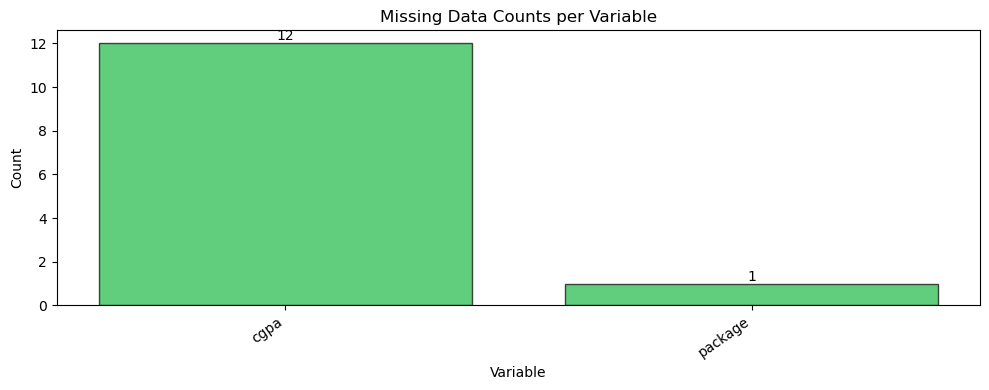

In [32]:
eda_helper.plot_missing_info(temp)

# 5. High-level analysis of Outliers

In [33]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [34]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-06-06,Kolkata,Banglore,2025-07-14 08:25:00,2025-07-14 04:40:00,1215,1.0,In-flight meal not included,8586,-1
5,Air India,2019-06-03,Delhi,Cochin,2025-07-14 13:15:00,2025-07-14 09:25:00,1210,2.0,No Info,10467,-1
6,Air Asia,2019-03-24,Kolkata,Banglore,2025-07-14 15:25:00,2025-07-14 22:55:00,450,2.0,No Info,11245,-1
12,Indigo,2019-04-01,Kolkata,Banglore,2025-07-14 09:20:00,2025-07-14 14:15:00,295,1.0,No Info,10308,-1
17,Jet Airways,2019-03-21,Delhi,Cochin,2025-07-14 18:20:00,2025-07-14 18:50:00,1470,2.0,No Info,12604,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-06-09,Kolkata,Banglore,2025-07-14 17:10:00,2025-07-14 19:40:00,150,0.0,No check-in baggage included,3841,-1
627,Spicejet,2019-05-09,Mumbai,Hyderabad,2025-07-14 13:15:00,2025-07-14 14:45:00,90,0.0,No check-in baggage included,2175,-1
634,Jet Airways,2019-05-01,Kolkata,Banglore,2025-07-14 06:30:00,2025-07-14 09:20:00,1610,1.0,In-flight meal not included,9663,-1
637,Jet Airways,2019-05-21,Delhi,Cochin,2025-07-14 14:00:00,2025-07-14 19:00:00,300,1.0,No Info,16079,-1


# 6. Pair Plots

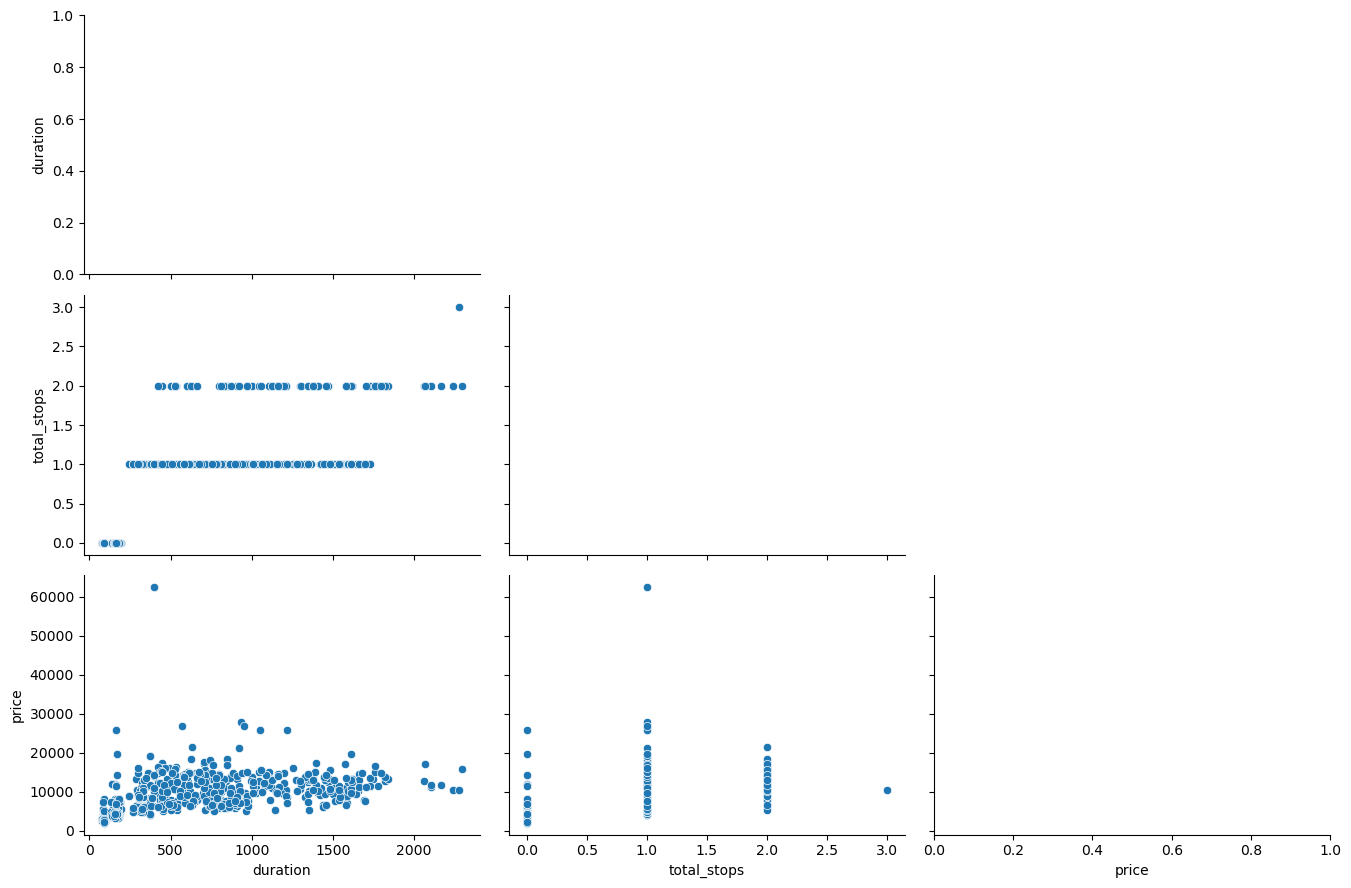

In [35]:
eda_helper.pair_plots(train)

# 7. Correlation Analysis

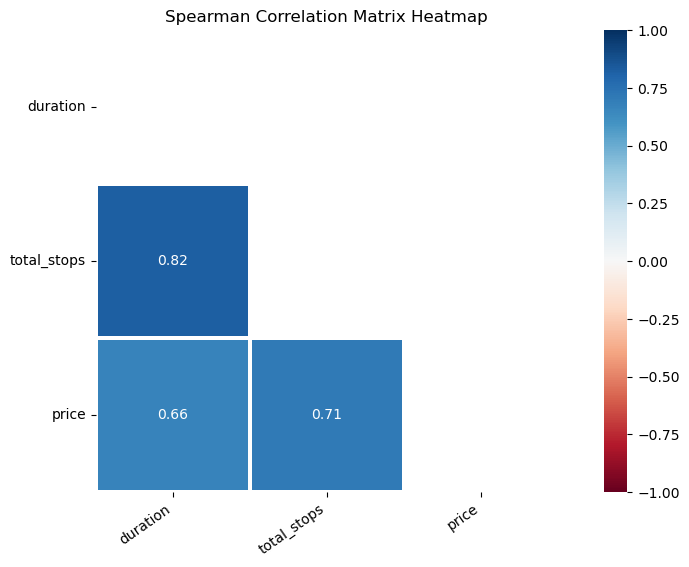

In [36]:
eda_helper.correlation_heatmap(train)

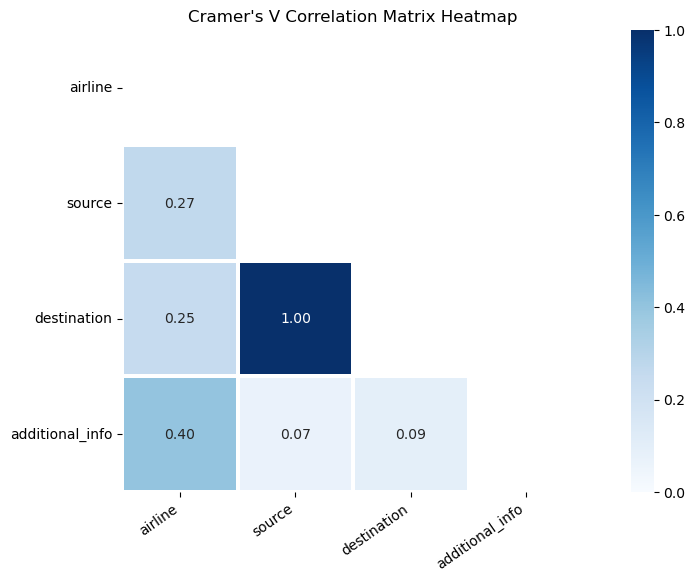

In [37]:
eda_helper.cramersV_heatmap(train)

# 8. Detailed Analysis

In [39]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 airline

In [40]:
train.airline

0            Jet Airways
1            Jet Airways
2            Jet Airways
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636    Multiple Carriers
637          Jet Airways
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [41]:
eda_helper.cat_summary(train, "airline")

0            Jet Airways
1            Jet Airways
2            Jet Airways
3            Jet Airways
4            Jet Airways
             ...        
635          Jet Airways
636    Multiple Carriers
637          Jet Airways
638            Air India
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,233


,count,percentage
category,,
Jet Airways,233,0.364063
Indigo,122,0.190625
Air India,103,0.160938
Multiple Carriers,76,0.118750
Spicejet,44,0.068750
Vistara,31,0.048438
Goair,17,0.026562
Air Asia,14,0.021875


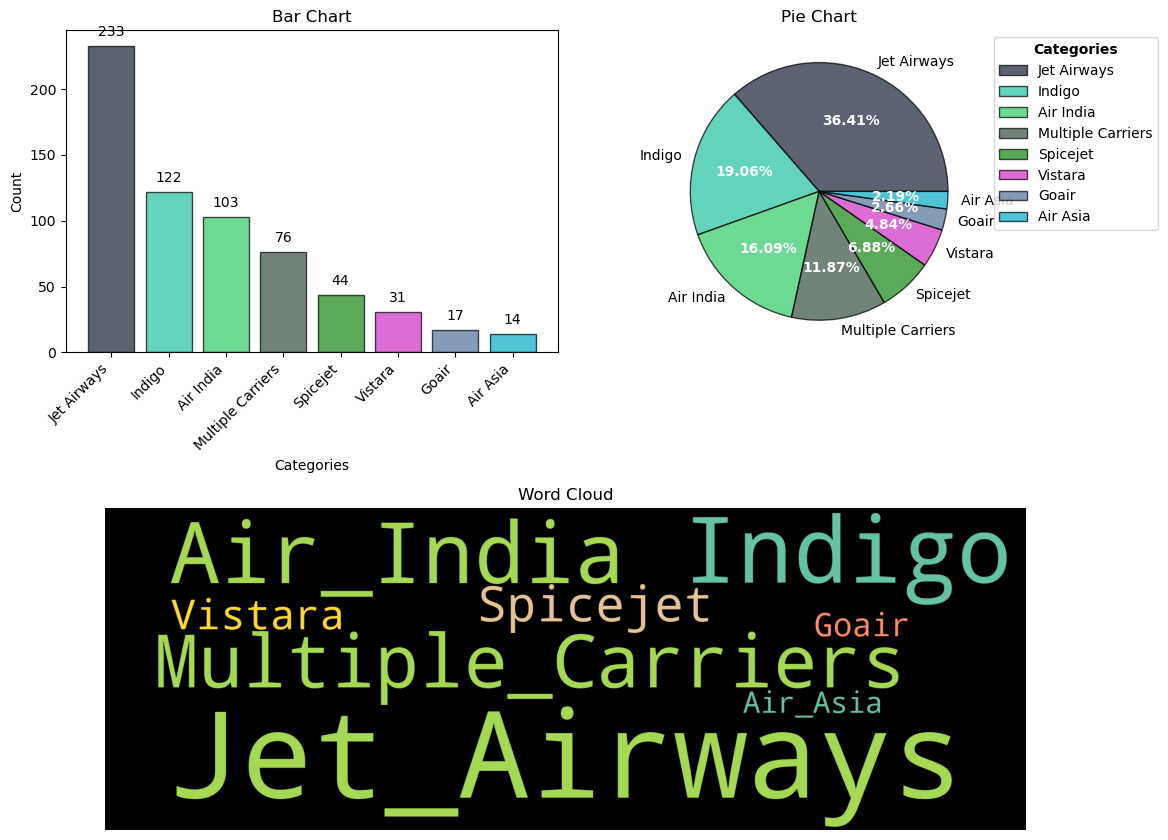

In [42]:
eda_helper.cat_univar_plots(train, "airline")

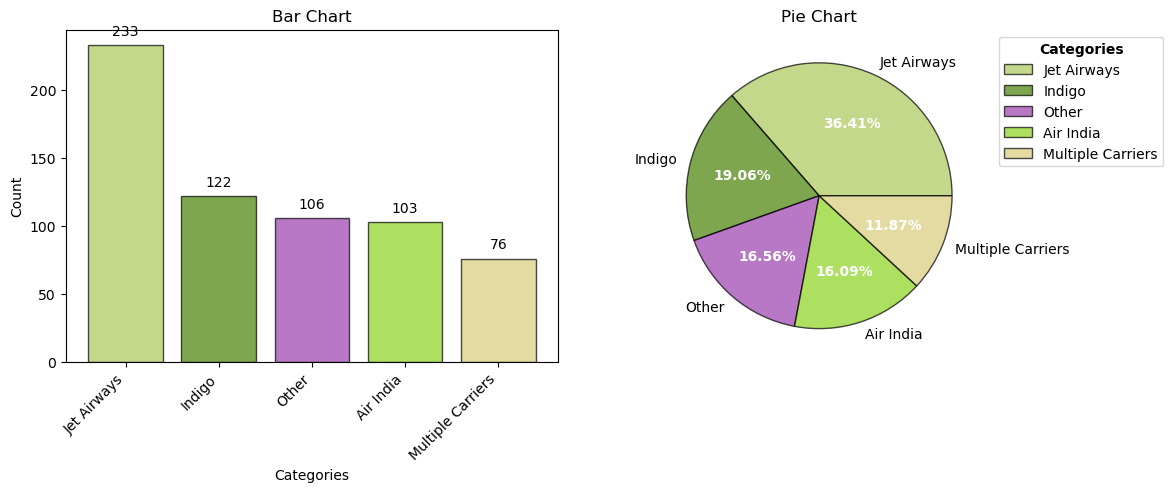

In [44]:
eda_helper.cat_univar_plots(train, "airline", show_wordcloud=False, k=4)

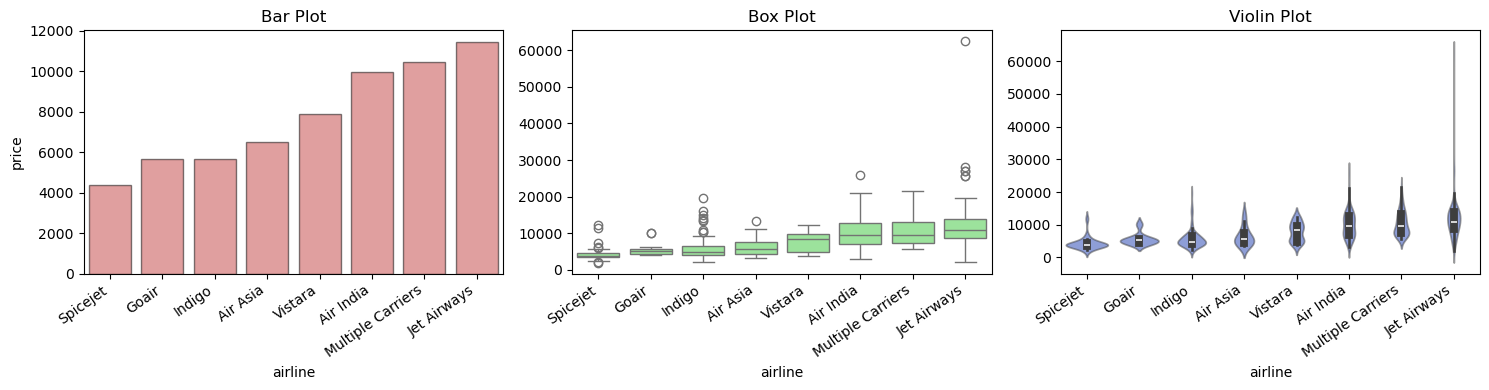

In [45]:
eda_helper.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [46]:
eda_helper.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 36.0109129680826
- p-value              : 2.068553711205984e-42
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 261.0129148037636
- p-value              : 1.252000170624849e-52
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


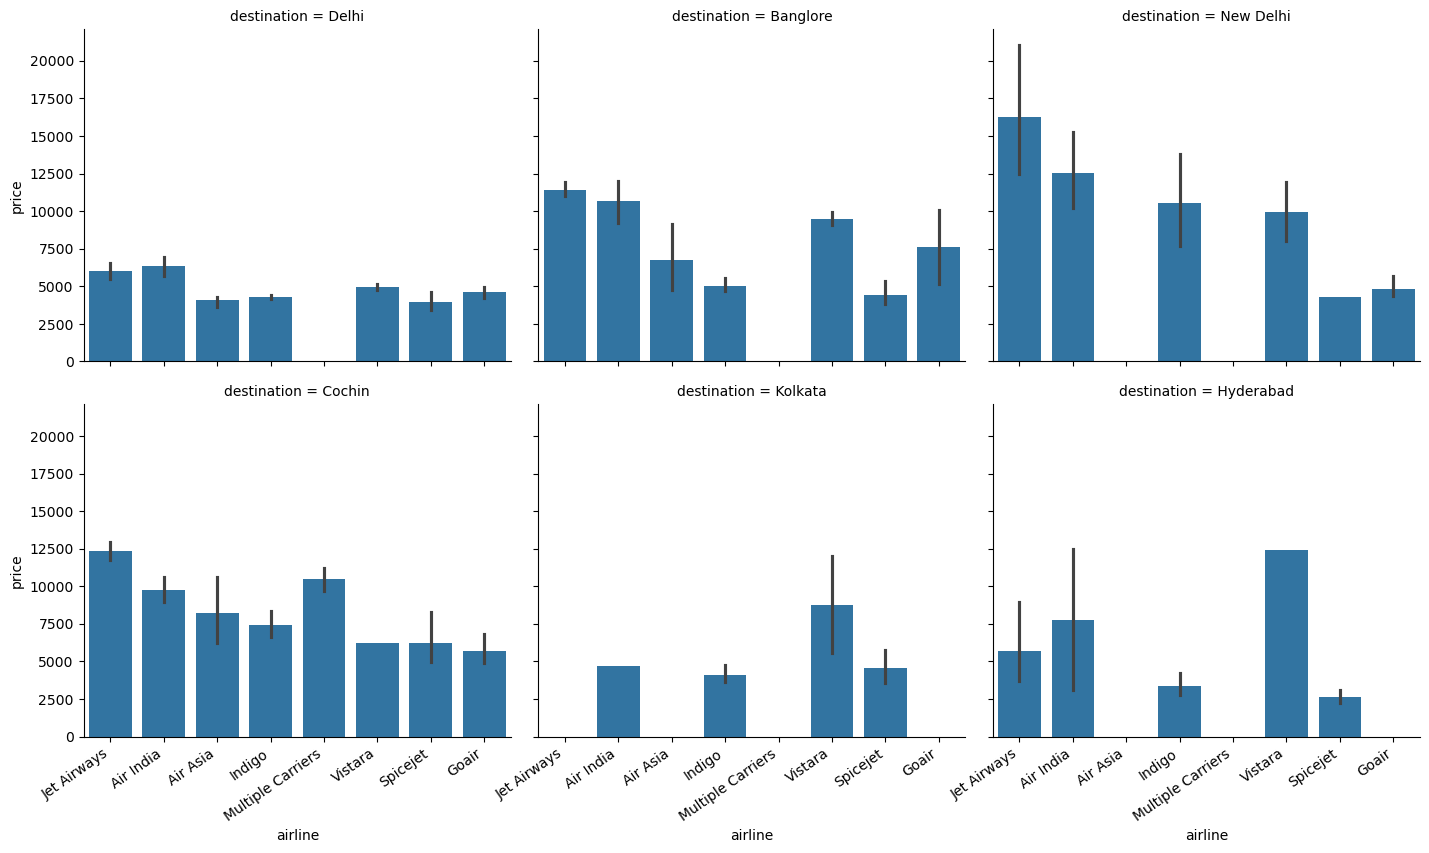

In [47]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper.rotate_xlabels(ax)

## 8.2 date_of_journey

In [48]:
train.date_of_journey

0     2019-04-27
1     2019-06-06
2     2019-05-18
3     2019-03-15
4     2019-06-06
         ...    
635   2019-03-06
636   2019-03-03
637   2019-05-21
638   2019-05-27
639   2019-06-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

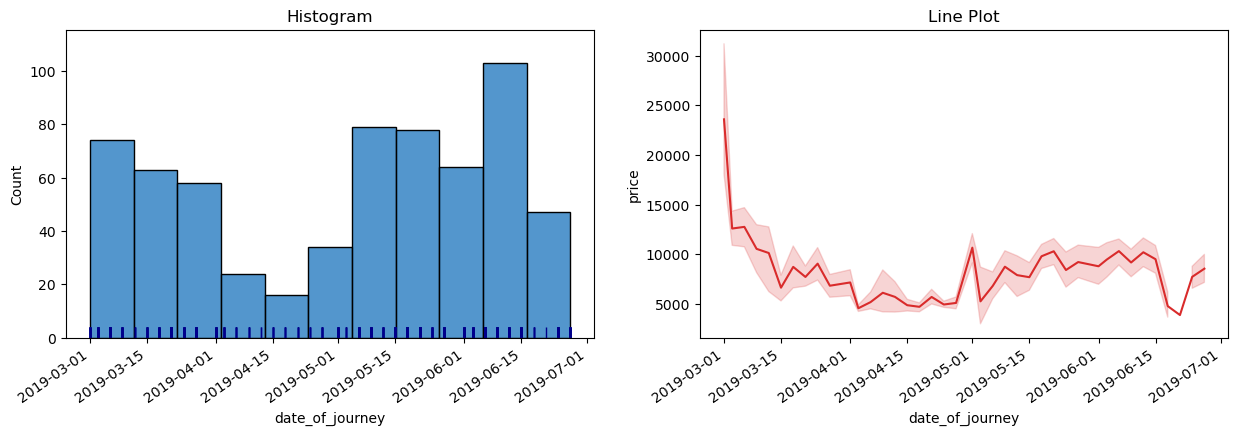

In [49]:
eda_helper.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

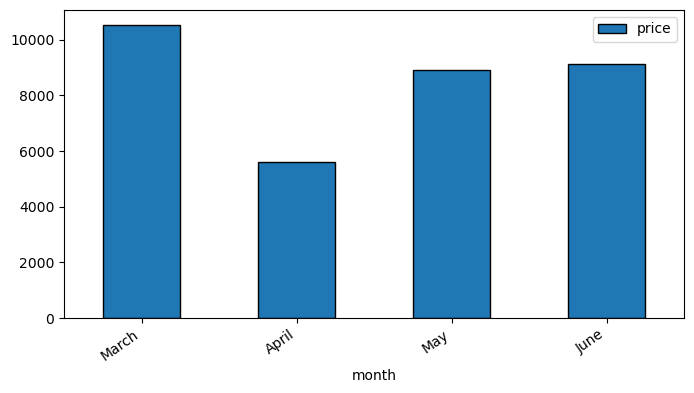

In [50]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper.rotate_xlabels(ax)

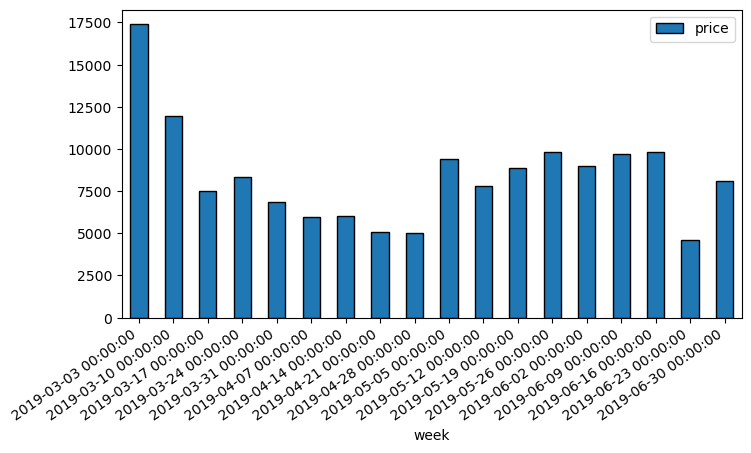

In [51]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper.rotate_xlabels(ax)

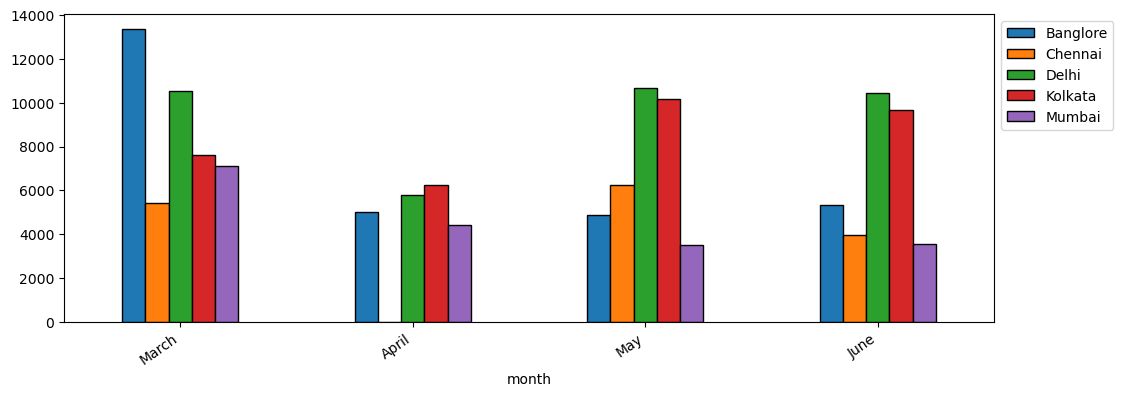

In [52]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper.rotate_xlabels(ax)

## 8.3 dep_time

In [53]:
train.dep_time

0     2025-07-14 19:50:00
1     2025-07-14 08:25:00
2     2025-07-14 17:00:00
3     2025-07-14 08:55:00
4     2025-07-14 20:25:00
              ...        
635   2025-07-14 11:30:00
636   2025-07-14 04:00:00
637   2025-07-14 14:00:00
638   2025-07-14 10:00:00
639   2025-07-14 05:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

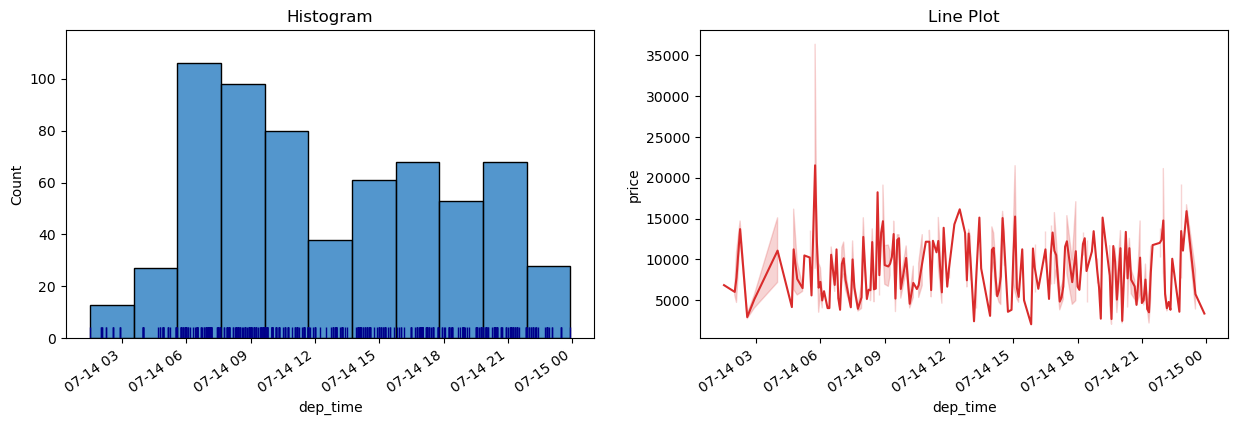

In [54]:
eda_helper.dt_univar_plots(train, "dep_time", "price")

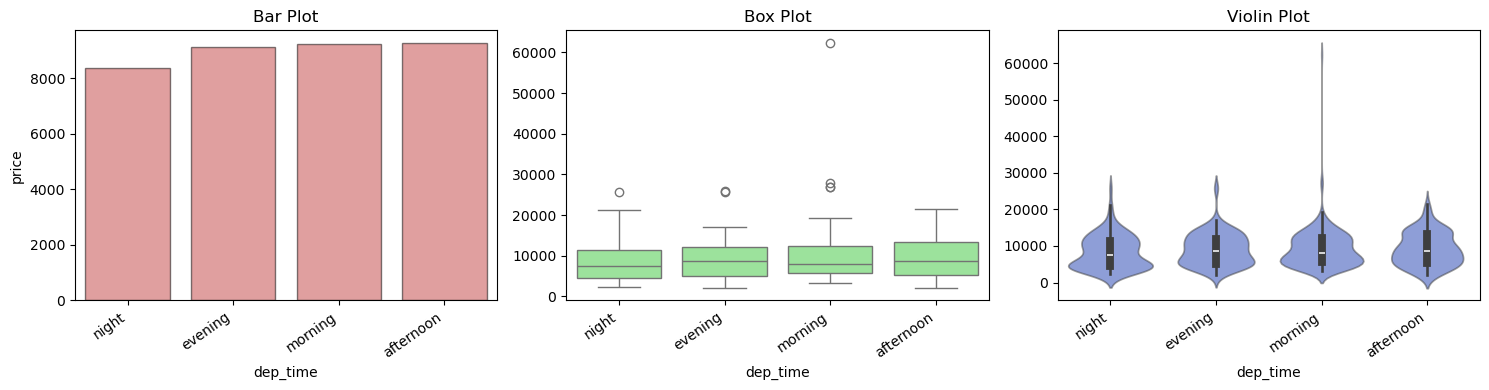

In [55]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper.num_cat_bivar_plots, "price", "dep_time")
)

# 8.4 duration

In [57]:
train.duration

0       180
1      1215
2       395
3       435
4      1295
       ... 
635     440
636     450
637     300
638     165
639    1375
Name: duration, Length: 640, dtype: int64

In [58]:
eda_helper.num_summary(train, "duration")

0       180
1      1215
2       395
3       435
4      1295
       ... 
635     440
636     450
637     300
638     165
639    1375
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,135.00
10,150.00
25,175.00
50,535.00
75,910.00
90,1450.50
95,1615.00
99,2068.05


,value
mean,646.531250
trimmed mean (5%),612.230903
trimmed mean (10%),583.212891
median,535.000000


,value
var,253560.327660
std,503.547741
IQR,735.000000
mad,365.000000
coef_variance,0.778845


,value
skewness,0.890385
kurtosis,-0.029796


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 8.385076265111468e-21
Test Statistic       : 0.8916406914619397
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 21.792196450737947
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [59]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    175.0
0.50    535.0
0.75    910.0
Name: duration, dtype: float64

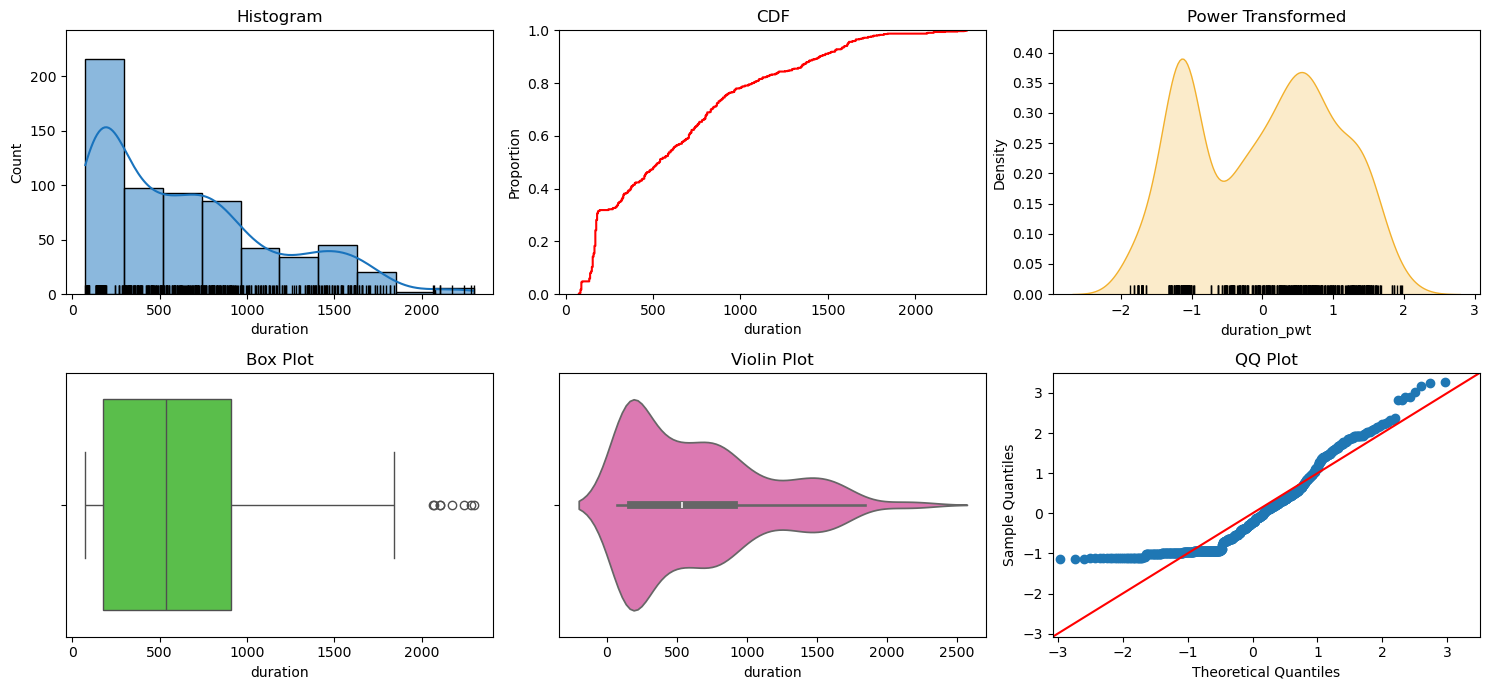

In [60]:
eda_helper.num_univar_plots(train, "duration")

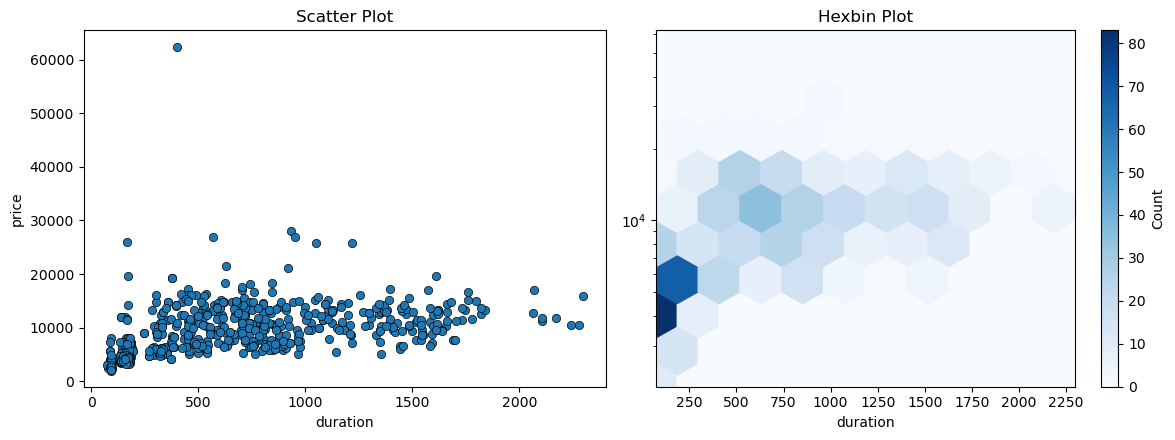

In [62]:
eda_helper.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=10,
		cmap="Blues"
	)
)

In [63]:
eda_helper.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4576252931804293
- p-value              : 1.9093378904886277e-34
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6641528182081904
- p-value              : 1.1914428166095157e-82
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


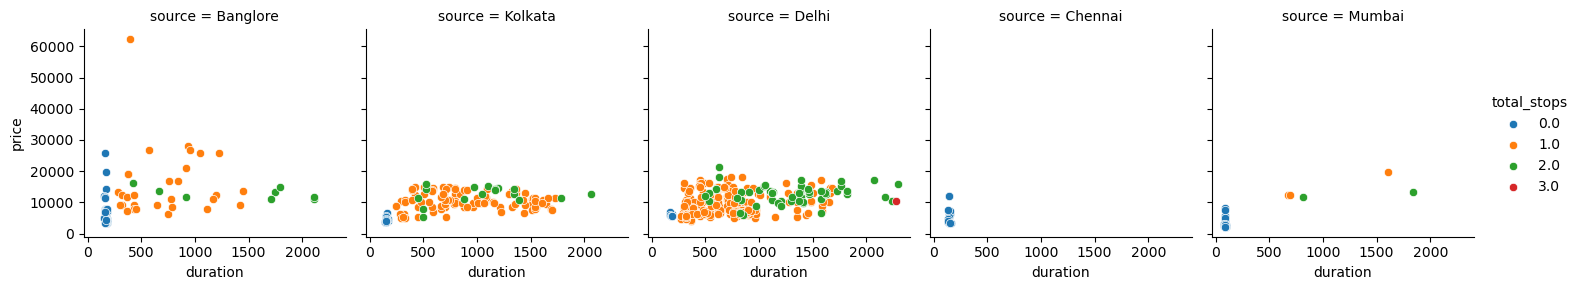

In [64]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

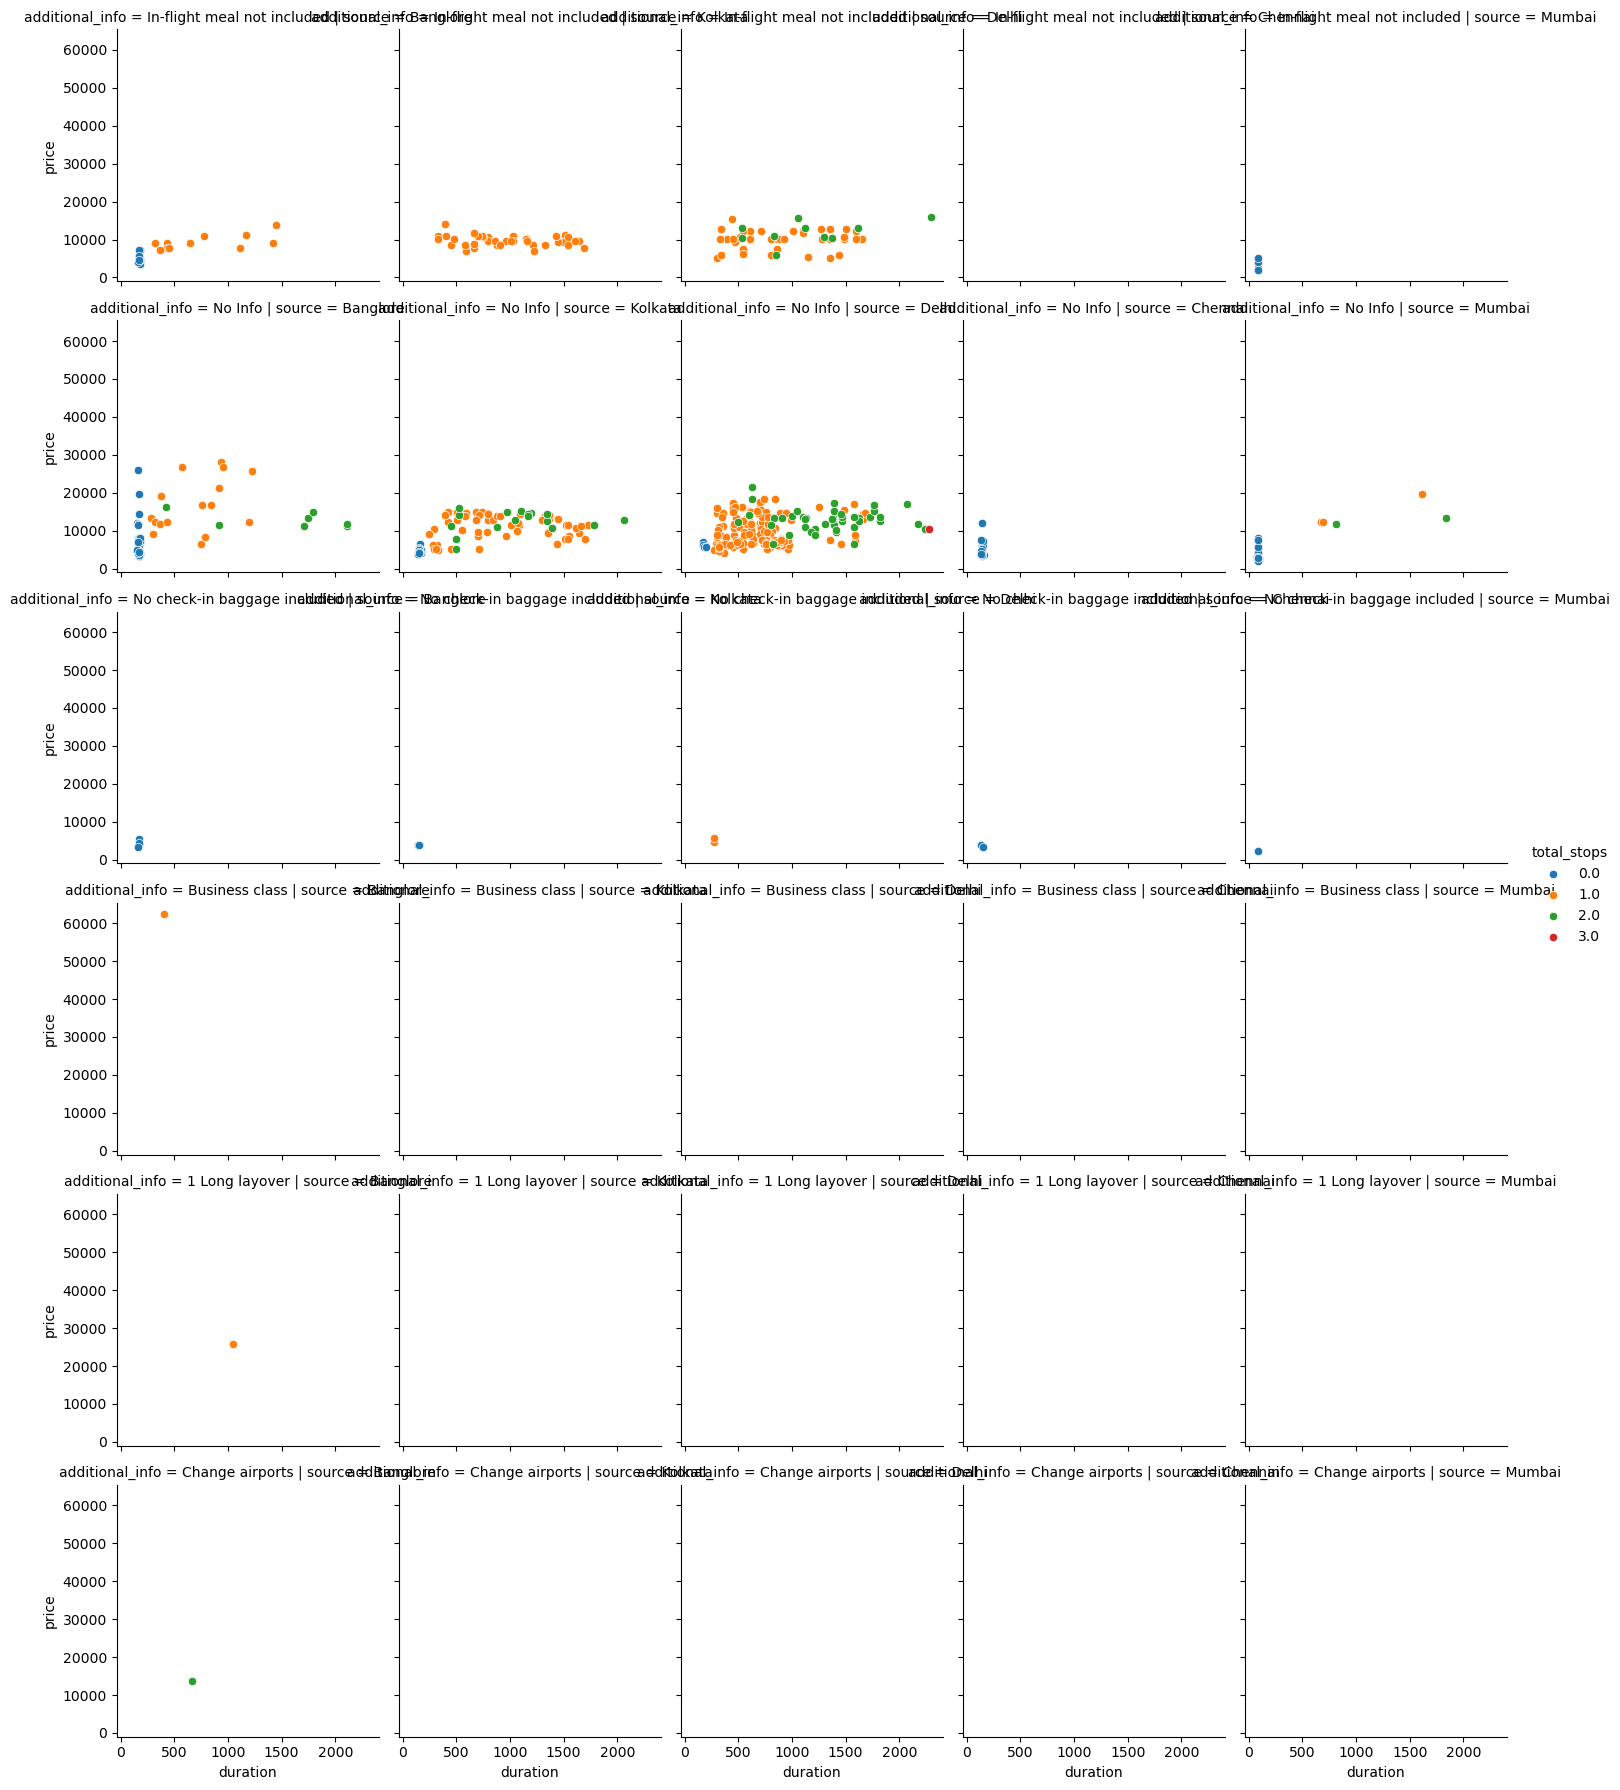

In [65]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [66]:
eda_helper.get_iqr_outliers(train, "duration")

Lower Limit : -927.5
Upper Limit : 2012.5


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
505,Air India,2019-05-15,Kolkata,Banglore,2025-07-14 05:50:00,2025-07-14 16:15:00,2065,2.0,No Info,12723
600,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-14 17:55:00,2025-07-14 04:25:00,2070,2.0,No Info,17072
134,Air India,2019-03-18,Banglore,New Delhi,2025-07-14 11:05:00,2025-07-14 22:10:00,2105,2.0,No Info,11161
590,Air India,2019-03-03,Banglore,New Delhi,2025-07-14 11:05:00,2025-07-14 22:10:00,2105,2.0,No Info,11791
483,Air India,2019-03-03,Delhi,Cochin,2025-07-14 07:05:00,2025-07-14 19:15:00,2170,2.0,No Info,11762
350,Air India,2019-05-21,Delhi,Cochin,2025-07-14 05:55:00,2025-07-14 19:15:00,2240,2.0,No Info,10493
386,Air India,2019-06-24,Delhi,Cochin,2025-07-14 05:15:00,2025-07-14 19:15:00,2280,3.0,No Info,10493
428,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-14 05:30:00,2025-07-14 19:45:00,2295,2.0,In-flight meal not included,15864


## 8.5 additional_info

In [67]:
eda_helper.cat_summary(train, "additional_info")

0      In-flight meal not included
1      In-flight meal not included
2                          No Info
3      In-flight meal not included
4                          No Info
                  ...             
635    In-flight meal not included
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,6
top,No Info
freq,485


,count,percentage
category,,
No Info,485,0.757812
In-flight meal not included,132,0.206250
No check-in baggage included,20,0.031250
Business class,1,0.001563
1 Long layover,1,0.001563
Change airports,1,0.001563


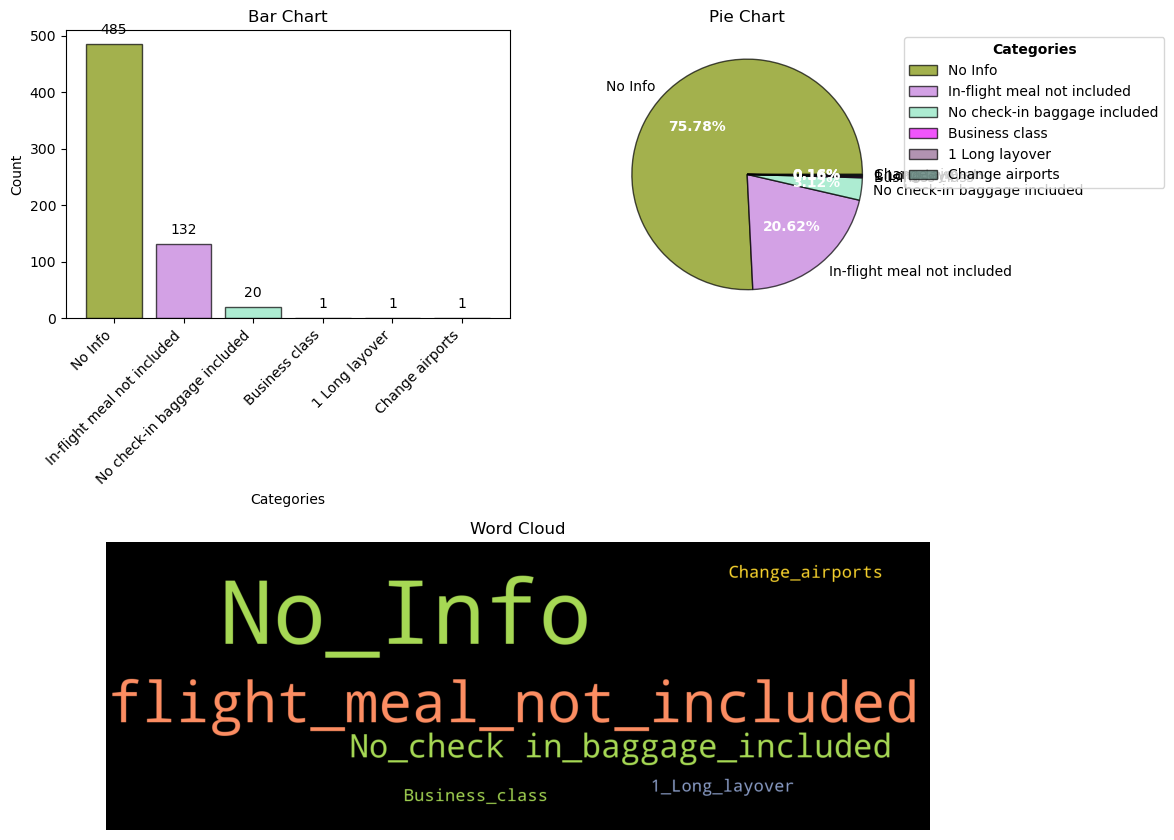

In [68]:
eda_helper.cat_univar_plots(train, "additional_info")

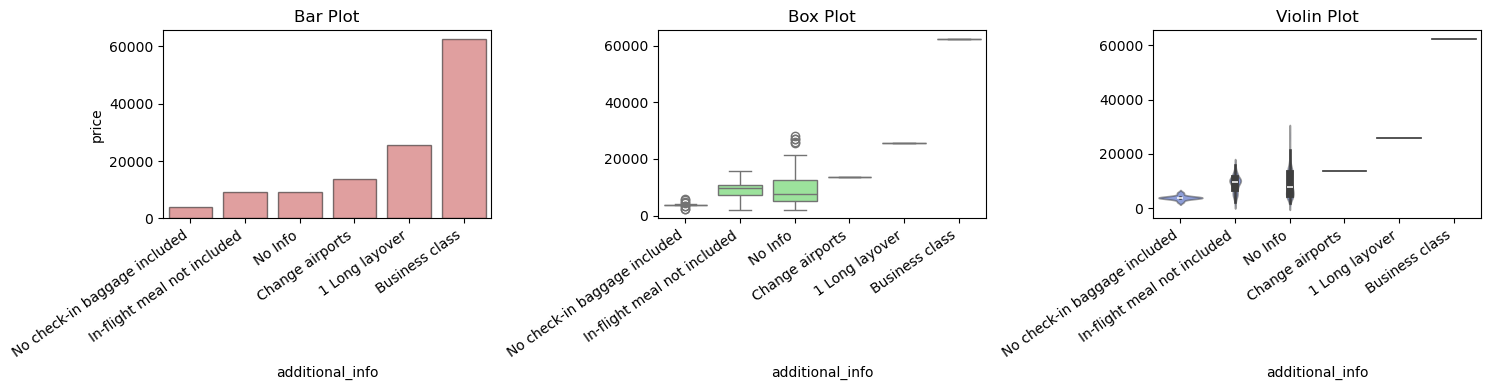

In [69]:
eda_helper.num_cat_bivar_plots(train, "price", "additional_info")

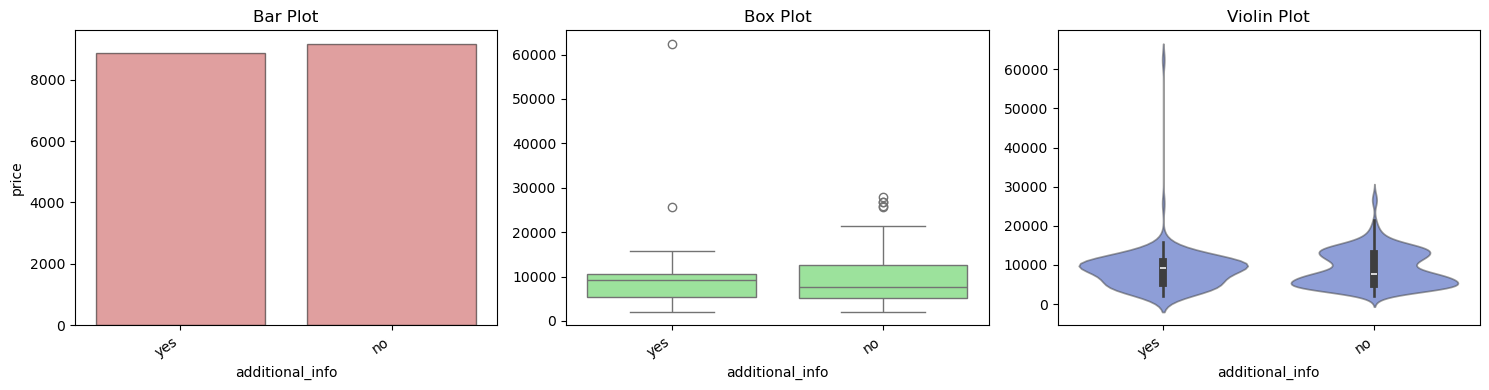

In [70]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper.num_cat_bivar_plots, "price", "additional_info")
)

# 9. Automated EDA

In [72]:
! pip install ydata_profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 4.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=c497981b83082fe79d44379471923975cc49cded175047cd34f74598cbaaf875
  Stored in directory: c:\users\prashant\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [73]:
from ydata_profiling import ProfileReport

In [74]:
report = ProfileReport(train)

In [75]:
report.to_file(output_file="eda_automated_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 273.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]